In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./Source Files/monsters.csv')
pd.set_option('display.max_columns', None)

In [6]:
df.shape

(322, 32)

In [7]:
df.columns

Index(['Unnamed: 0', '_id', 'index', 'name', 'size', 'type', 'subtype',
       'alignment', 'armor_class', 'hit_points', 'hit_dice', 'speed',
       'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom',
       'charisma', 'proficiencies', 'damage_vulnerabilities',
       'damage_resistances', 'damage_immunities', 'condition_immunities',
       'senses', 'languages', 'challenge_rating', 'special_abilities',
       'actions', 'legendary_actions', 'url', 'reactions', 'other_speeds'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              322 non-null    int64  
 1   _id                     322 non-null    object 
 2   index                   322 non-null    object 
 3   name                    322 non-null    object 
 4   size                    322 non-null    object 
 5   type                    322 non-null    object 
 6   subtype                 64 non-null     object 
 7   alignment               322 non-null    object 
 8   armor_class             322 non-null    int64  
 9   hit_points              322 non-null    int64  
 10  hit_dice                322 non-null    object 
 11  speed                   322 non-null    object 
 12  strength                322 non-null    int64  
 13  dexterity               322 non-null    int64  
 14  constitution            322 non-null    in

Text(0.5, 1.0, 'CR (Challenge Rating) Overall Counts')

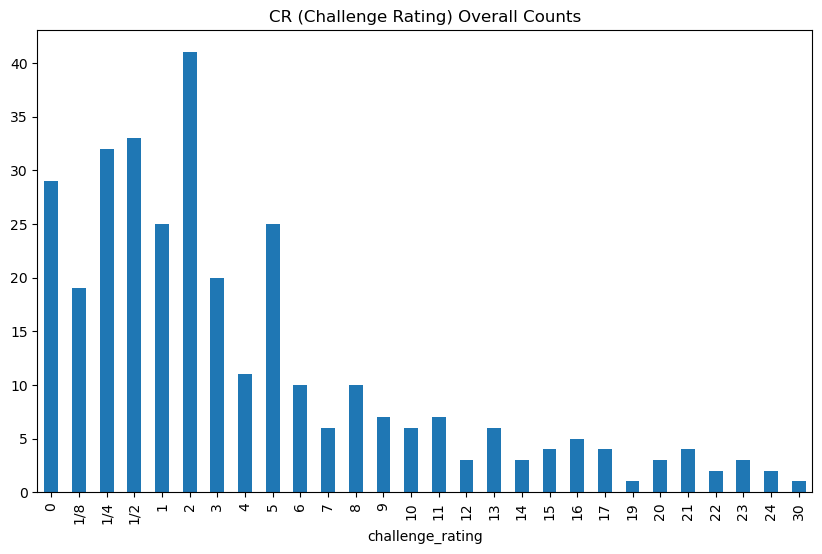

In [9]:
data = df['challenge_rating']
data = data.sort_values()
data = data.astype(str)
data = data.str.replace('0.5', '1/2')
data = data.str.replace('0.25', '1/4')
data = data.str.replace('0.125', '1/8')
data = data.str.replace('.0', '')

plt.figure(figsize=(10,6))
data.value_counts()[data.unique()].plot(kind='bar')
plt.title("CR (Challenge Rating) Overall Counts")

Text(0.5, 1.0, 'Monster size distribution')

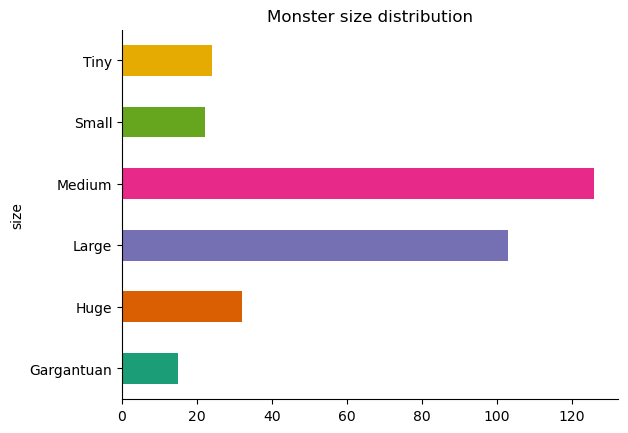

In [10]:
df.groupby('size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Monster size distribution")

Text(0.5, 1.0, 'Average HP per type')

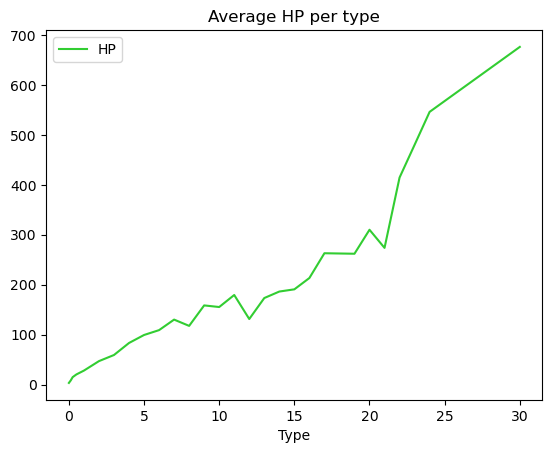

In [ ]:
hp = df['hit_points']
monster_type = df['challenge_rating']
type_hp = pd.DataFrame({'HP': hp, 'Type': monster_type})
mean_type_hp = type_hp.groupby(['Type']).mean()

mean_type_hp.plot(kind='line', color='limegreen')
plt.title('Average HP by CR')

Text(0.5, 1.0, 'Average AC per type')

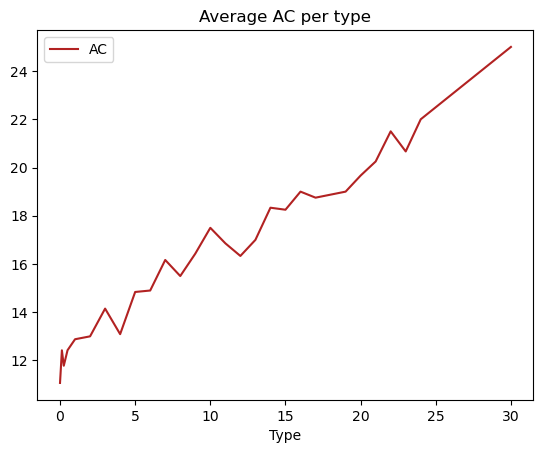

In [ ]:
ac = df['armor_class']
monster_type = df['challenge_rating']
type_ac = pd.DataFrame({'AC': ac, 'Type': monster_type})
mean_type_ac = type_ac.groupby(['Type']).mean()

mean_type_ac.plot(kind='line', color='firebrick')
plt.title('Average AC by CR')

Text(0.5, 1.0, 'Stat Averages per Monster Type')

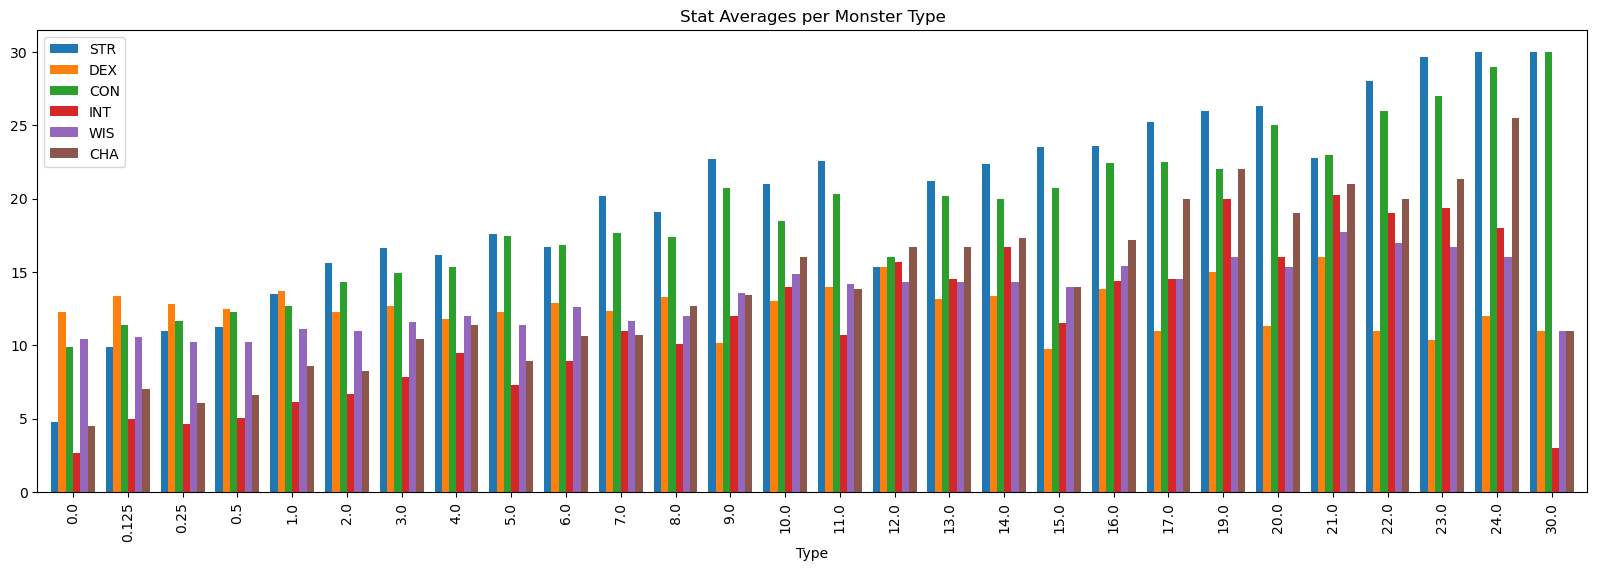

In [ ]:
str = df['strength']
dex = df['dexterity']
con = df['constitution']
int = df['intelligence']
wis = df['wisdom']
cha = df['charisma']
monster_type = df['challenge_rating']
type_stats = pd.DataFrame({'STR': str, 'DEX': dex, 'CON': con, 'INT': int, 'WIS': wis, 'CHA': cha, 'Type': monster_type})
mean_type_stats = type_stats.groupby(['Type']).mean()

mean_type_stats.plot(kind='bar', figsize=(20, 6), width=.8)
plt.title('Stat Averages per CR')